<a href="https://colab.research.google.com/github/TheAcoff/Notebook-Alura/blob/main/Machine_Learning/Keras_e_TF_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primeiros conceitos de redes neurais com a Fashion MNIST

In [ ]:
import tensorflow
from tensorflow import keras
import keras

Primeiramente, importamos o dataset e separamos ele em treino e teste.

In [ ]:
dataset = keras.datasets.fashion_mnist
((imagens_treino,identificacoes_treino),(imagens_teste,identificacoes_teste)) = dataset.load_data()

4422102/4422102 [==============================] - 1s 0us/step


Podemos visualizar um dos elementos e ver a quantidade de dados que temos para trabalhar

In [ ]:
imagens_treino[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [ ]:
len(imagens_treino)

60000

In [ ]:
imagens_treino.shape

(60000, 28, 28)

Uma forma mais visual de ver os elementos do dataset usando o matplotlib

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, '9')

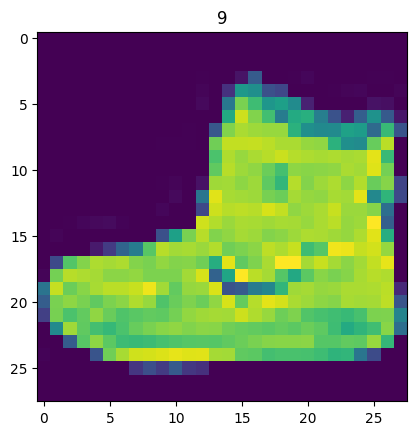

In [ ]:
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

Intervalo de identificadores

In [ ]:
print(identificacoes_treino.min())
print(identificacoes_treino.max())

0
9


Vendo os identificadores

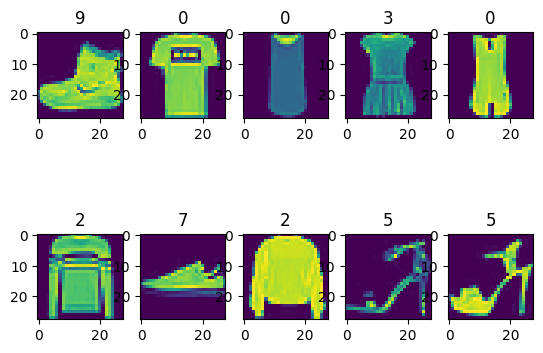

In [ ]:
for imagem in range(10):
  plt.subplot(2,5,imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(identificacoes_treino[imagem])

Vendo a documentação, podemos tirar quais são os resultados para cada label

In [ ]:
nomes_classificacoes=['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

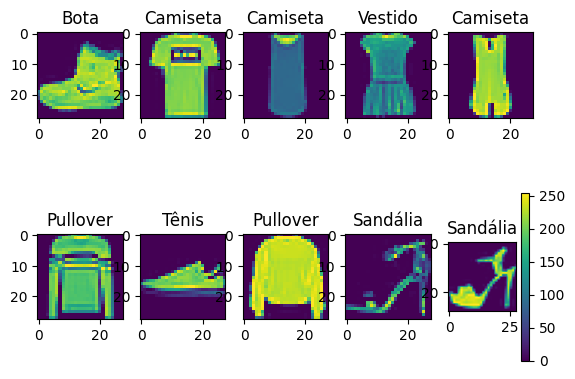

In [ ]:
for imagem in range(10):
  plt.subplot(2,5,imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_classificacoes[identificacoes_treino[imagem]])
plt.colorbar()

Podemos tentar reduzir a função loss normalizando as cores das imagens

In [ ]:
imagens_treino = imagens_treino/float(255)

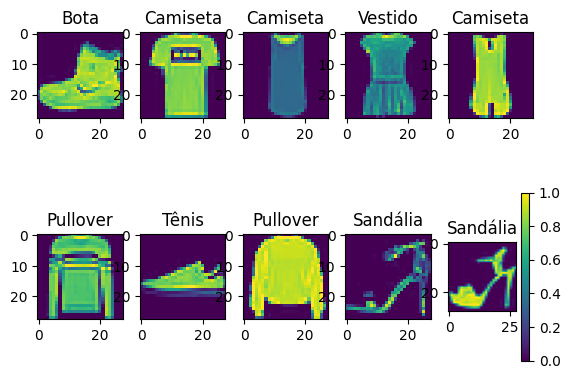

In [ ]:
for imagem in range(10):
  plt.subplot(2,5,imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_classificacoes[identificacoes_treino[imagem]])
plt.colorbar()

## Modelo
Temos que ter um modelo com uma entrada, um processamento e uma saída em sequência

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 21805

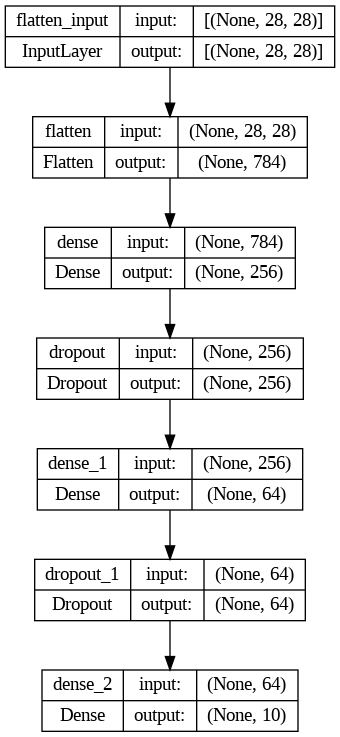

In [ ]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation = 'softmax')
    ])

print(modelo.summary())
keras.utils.plot_model(modelo, show_shapes=True, show_layer_names=True)

In [ ]:
modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics = [['accuracy']])

In [ ]:
historico = modelo.fit(x = imagens_treino,y = identificacoes_treino,
           epochs = 30,
           batch_size=8,
           validation_split = 0.2)

Epoch 1/30
6000/6000 [==============================] - 26s 4ms/step - loss: 0.5796 - accuracy: 0.7915 - val_loss: 0.4366 - val_accuracy: 0.8429
Epoch 2/30
6000/6000 [==============================] - 24s 4ms/step - loss: 0.4492 - accuracy: 0.8384 - val_loss: 0.4161 - val_accuracy: 0.8518
Epoch 3/30
6000/6000 [==============================] - 24s 4ms/step - loss: 0.4065 - accuracy: 0.8516 - val_loss: 0.3784 - val_accuracy: 0.8650
Epoch 4/30
6000/6000 [==============================] - 22s 4ms/step - loss: 0.3894 - accuracy: 0.8596 - val_loss: 0.3675 - val_accuracy: 0.8673
Epoch 5/30
6000/6000 [==============================] - 23s 4ms/step - loss: 0.3719 - accuracy: 0.8652 - val_loss: 0.3538 - val_accuracy: 0.8732
Epoch 6/30
6000/6000 [==============================] - 24s 4ms/step - loss: 0.3617 - accuracy: 0.8681 - val_loss: 0.3619 - val_accuracy: 0.8688
Epoch 7/30
6000/6000 [==============================] - 23s 4ms/step - loss: 0.3541 - accuracy: 0.8709 - val_loss: 0.3441 - val_ac

In [ ]:
testes = modelo.predict(imagens_teste)

313/313 [==============================] - 1s 2ms/step


In [ ]:
import numpy as np

A rede falou Bolsa
A resposta é Bolsa


Text(0.5, 1.0, 'Bolsa')

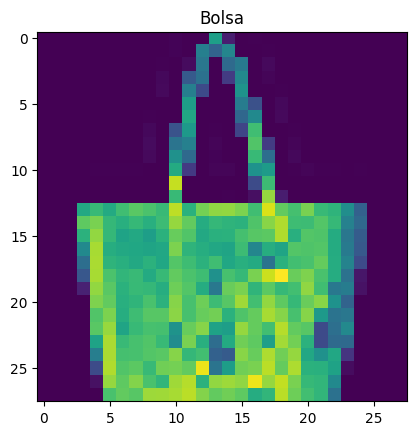

In [ ]:
i = 256
print(f'A rede falou {nomes_classificacoes[np.argmax(testes[i])]}')
print(f'A resposta é {nomes_classificacoes[identificacoes_teste[i]]}')

plt.imshow(imagens_teste[i])
plt.title(nomes_classificacoes[identificacoes_teste[i]])

In [ ]:
loss_teste, acc_teste = modelo.evaluate(imagens_teste, identificacoes_teste,
                                        batch_size=10,)

print(f'Acurácia: {acc_teste}')
print(f'Loss Value: {loss_teste}')

1000/1000 [==============================] - 2s 2ms/step - loss: 78.9736 - accuracy: 0.8645
Acurácia: 0.8644999861717224
Loss Value: 78.97357177734375


### Histórico

In [ ]:
historico.history

{'loss': [0.5707109570503235,
  0.4413587749004364,
  0.405478835105896,
  0.38541483879089355,
  0.3698403835296631,
  0.3571438491344452,
  0.3477822542190552,
  0.3434298038482666,
  0.3349663019180298,
  0.3240213394165039,
  0.3191751539707184,
  0.31876757740974426,
  0.3124181926250458,
  0.30881527066230774,
  0.3075074851512909,
  0.30308404564857483,
  0.2943190634250641,
  0.294280081987381,
  0.2910412549972534,
  0.2911146581172943,
  0.2830680310726166,
  0.2828168570995331,
  0.28151509165763855,
  0.2795560657978058,
  0.2737981677055359,
  0.26959556341171265,
  0.2747783064842224,
  0.27228662371635437,
  0.26942238211631775,
  0.26531362533569336],
 'accuracy': [0.7963125109672546,
  0.8409374952316284,
  0.8507500290870667,
  0.8582291603088379,
  0.8667083382606506,
  0.8708541393280029,
  0.8731874823570251,
  0.8745833039283752,
  0.8763541579246521,
  0.8811666369438171,
  0.8846041560173035,
  0.8837291598320007,
  0.8853541612625122,
  0.8865833282470703,
  0.

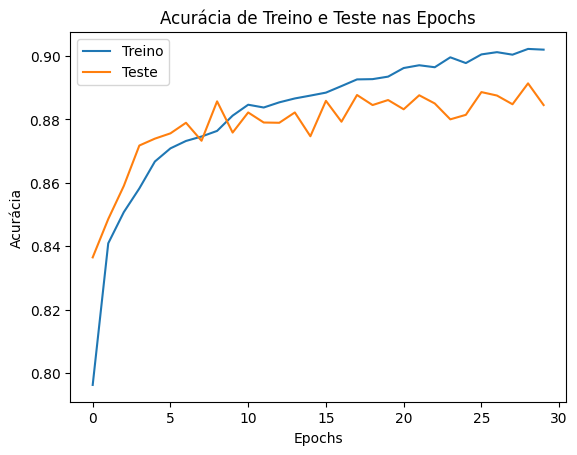

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Acurácia')
plt.title('Acurácia de Treino e Teste nas Epochs')
plt.legend(['Treino','Teste'])

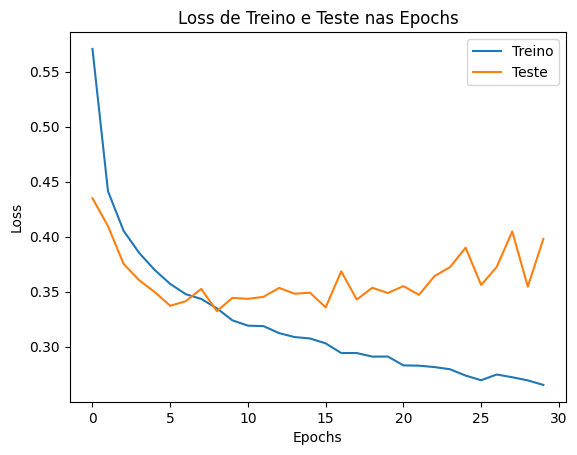

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss de Treino e Teste nas Epochs')
plt.legend(['Treino','Teste'])

In [ ]:
modelo.save('Deep30Epochs_4Camadas.h5')

---